# Liquid-liquid equilibrium in polymer solutions

## Test of the flash calculation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from plt_tools import get_figsize, set_plt_rc

from Tompa import Tompa
from Kamide import Kamide

In [3]:
for_paper = True
language = 'en'

plt = set_plt_rc(plt, for_paper=for_paper)

## Base case

In [5]:
r_pol = np.array([10,100,200,300,400,500,600,700,800,900,
                  1000,1250, 1500, 1750,2000,2500, 3000,4000,
                  5000,6000,7000,8000,9000,10000])

## Kamide's model (2000)

The Kamide model results in a numerically difficult problem. The only one of the several methods used that manages to find the minimum is Matlab's `particleswarm`. Below is a test with the minimum found there, for checking the objective function.

In [18]:
A = 0.56

K = Kamide(equilibrium_method='optimize', r_pol = r_pol, coarsen=False)

vi_min = [0.125365326165022,   0.000006265572189,   
0.000071604832484,   0.000164884120576,   0.000276282165254, 
0.000414568380921, 0.000566001769070 ,  0.000721726877431 ,  
0.000882124751066 ,  0.001019511351434,   0.001140723133599, 
0.001236903607398, 0.001369783268867   ,0.001376255875674  , 
0.001288276110222  , 0.001166113719800  , 0.000890887874223  ,
 0.000650751273243, 0.000319083049873 ,  0.000146664623368  , 
 0.000064745585454  , 0.000027722598310  , 0.000011648326121 ,
 0.000004827496670, 0.000001960417143]

K.A = A
K.gibbs_energy(vi_min)

-0.00909829230861658

The 'DIRECT' algorithm is the only one I've tested in Python that comes even close to the value above. However, it does not converge well and for low interaction values, it cannot separate phases.

     fun: -0.0089081495003225
 message: 'Number of iterations is larger than maxiter=1000'
    nfev: 4097
     nit: 1000
  status: 2
 success: False
       x: array([8.16666833e-01, 3.61956168e-05, 3.29432329e-04, 3.58000423e-04,
       4.85695381e-04, 1.95944879e-04, 2.21502578e-04, 2.40425095e-04,
       2.53744203e-04, 2.62355355e-04, 2.67034289e-04, 2.68451705e-04,
       2.61327494e-04, 2.44250551e-04, 2.21974775e-04, 1.97637431e-04,
       1.50005655e-04, 1.09379275e-04, 5.40491197e-05, 2.52923258e-05,
       1.16254756e-05, 5.46291536e-06, 2.77878210e-06, 1.63807275e-06,
       1.16210014e-06])

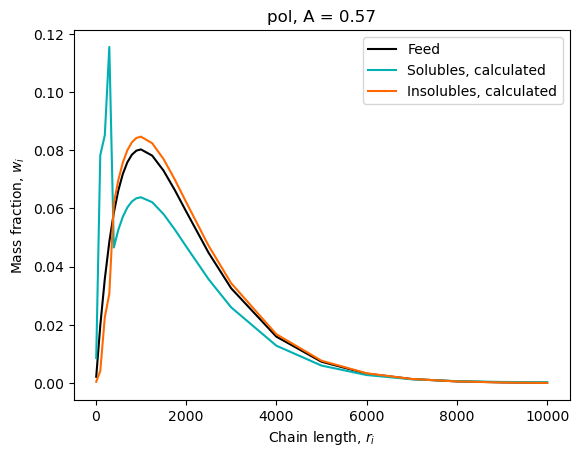

In [ ]:
# threshold: 0.53

A = 0.57

K.estimation_objF(A)
K.plot_Calculated_Distributions()
K.result_opt

TODO: investigate why the Matlab algorithm can perform so well. Maybe implement it?

## Tompa's model (1951)

Tompa's model (1951), associated with Heidemman's resolution method  (2006), leads to a much simpler problem resolution. The downside is losing the matrix form of the interaction parameters (which I didn't use even in this work anyway.)

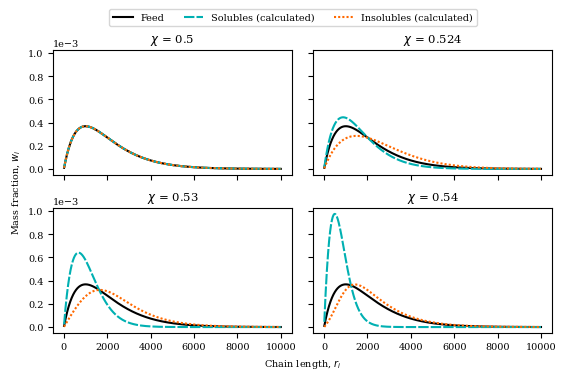

In [10]:
# threshold: 0.53

if for_paper:
    fs = get_figsize(columnwidth=140, unit='mm')

A = [0.5,0.524,0.53,0.54]

fig, ax = plt.subplots(2,2,sharey=True,sharex=True,figsize=fs)

T = Tompa()

for i in range(len(A)):

    T.estimation_objF(A[i])
    T.plot_Calculated_Distributions(ax=ax.ravel()[i], plot_feed=True)
    ax.ravel()[i].set_title('$\chi$ = '+str(A[i]))
    ax.ravel()[i].ticklabel_format(axis='y', style='sci', scilimits=(-3,-3))

handles, labels = ax[-1,-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',ncol=4,bbox_to_anchor=(0.5, 1.05))

fig.tight_layout()

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Chain length, $r_i$")
plt.ylabel("Mass fraction, $w_i$")

plt.savefig('figures/flash_tompa.pdf',bbox_inches='tight')


## Real case

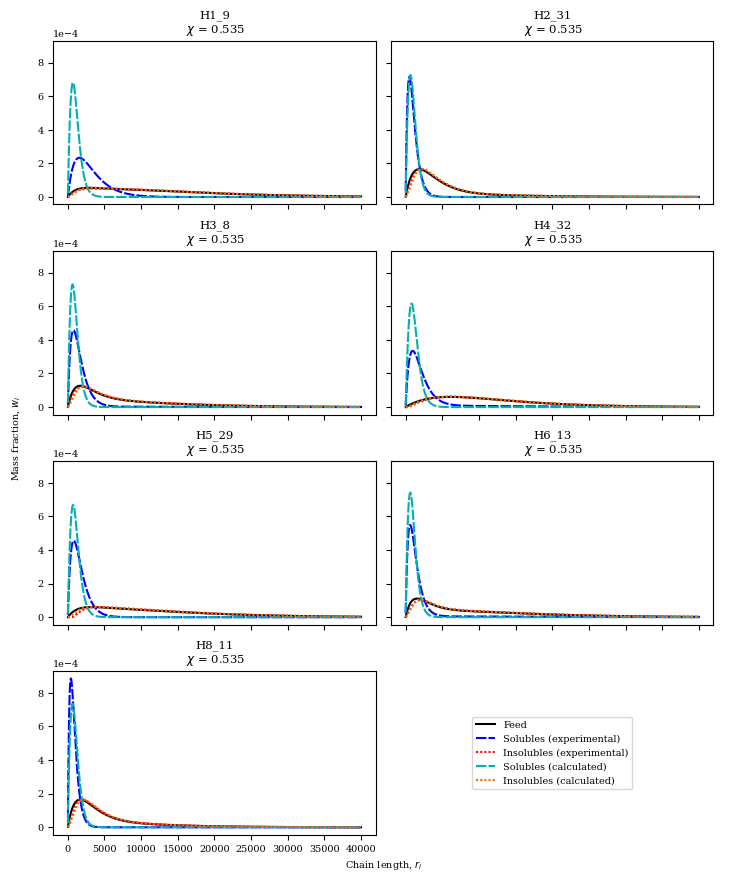

In [80]:
####################
# EXPERIMENTAL DATA
####################

z_sol = 0.97738

labels = ['H1_9','H2_31','H3_8','H4_32','H5_29','H6_13','H8_11']

teta1 = 1e-4*np.array([[1.29, 0.000], [1.55, 0.0], [1.58, 1.163],
                       [1.63, 1.266], [1.37, 0.0], [1.39, 1.406],
                       [1.85, 0.0]])

teta2 = 1e-4*np.array([[6.08, 6.348], [5.6, 19.44], [6.57, 13.07],
                      [0.00, 10.52], [5.2, 12.38], [7.40, 16.20],
                      [6.30, 24.07]])

alpha = np.array([[0.868, 0.000],[0.237, 0.000],[0.549, 0.053],
                  [1.000, 0.145],[0.839, 0.000],[0.655, 0.083],
                  [0.353, 0.000]])

mw = np.array([582261, 242779, 349674, 514920, 540133, 435169, 246094])

xs = 1e-2*np.array([3.98, 4.58, 4.59, 3.43, 6.67, 6.48, 4.53])

# creating list of objects for each polymer
polymers = [Tompa(label=labels[i], z_sol = z_sol,
                  shulz_kind='3P', r_pol = np.arange(1e1,4e4),
                  teta1 = teta1[i], teta2 = teta2[i],
                  alpha = alpha[i],xs_fraction = xs[i]) 
            for i in range(len(labels))]

########################
# INTERACTION PARAMETER
########################

A = 0.535

########################
# PLOTTING
########################

if for_paper:
    fs = get_figsize(columnwidth=190, hf_abs = 230, unit='mm')

fig, ax = plt.subplots(4,2,sharey=True,sharex=True,figsize=fs)

for i in range(len(polymers)):
    polymers[i].estimation_objF(A)
    polymers[i].plot_Experimental_Distributions(ax=ax.ravel()[i])
    polymers[i].plot_Calculated_Distributions(ax=ax.ravel()[i])
    ax.ravel()[i].set_title(labels[i]+f'\n $\chi$ = {A}')
    plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,-4))

ax[-1,-1].axis('off')

handles, labels = ax[0,0].get_legend_handles_labels()
ax[-1,-1].legend(handles, labels, loc='center')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel("Chain length, $r_i$")
plt.ylabel("Mass fraction, $w_i$")

fig.tight_layout()

plt.savefig('figures/flash_test.pdf',bbox_inches='tight')